<a href="https://colab.research.google.com/github/Chathurya99/Pose_Fit_FYP/blob/master/Workout_Squats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [2]:
# Upload first your data before execute these code below
path_workout = "/content/squats.csv"; # change this
path_other = "/content/other.csv"; # change this
name_class = "squat" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [3]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [4]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,335.76605,120.989520,341.99008,117.466390,329.88950,116.361450,349.67694,122.966490,321.40994,121.882225,...,318.33685,234.88600,362.22308,303.71060,312.79816,299.47840,376.03195,356.92400,297.02847,360.94570
1,335.55334,86.433205,341.27374,81.378310,329.32600,80.475240,348.47272,91.439260,321.75586,89.277300,...,317.14478,235.86902,361.17334,323.80728,310.86710,325.66710,377.19916,398.24783,296.13990,397.95040
2,335.52340,105.493730,341.64110,101.679855,329.58550,100.388020,349.34970,108.236840,322.17236,107.935430,...,317.03638,236.34612,364.98694,313.73676,310.16107,314.83533,377.46190,377.60248,296.36334,381.10858
3,335.79382,94.158970,341.13330,89.180016,329.96616,87.931305,348.73203,97.691475,321.32780,96.213066,...,316.91724,236.22630,364.60190,323.51627,308.33070,325.26843,376.93230,397.68300,295.58774,399.15320
4,335.83087,110.824490,341.19510,106.874470,330.30560,105.447716,349.20703,113.811080,321.89984,112.226410,...,316.71405,242.09322,366.43866,315.67453,308.00076,318.62400,378.10757,382.05078,296.71014,382.94640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,346.25287,103.427530,350.75604,96.685220,339.55670,96.927030,355.09122,101.691345,328.56440,102.701540,...,324.91610,238.35701,368.33157,318.04930,314.50214,319.50687,382.13257,382.37048,300.89194,384.29892
491,346.09302,96.820790,350.09480,90.040310,338.68480,91.022680,353.68800,94.991130,327.72235,97.568146,...,324.45040,242.09485,369.99084,329.37976,313.10180,329.53754,382.50565,393.40253,301.05838,398.55182
492,346.08487,109.007800,349.98334,101.906850,339.26804,102.873020,354.11682,105.595850,328.37238,109.992190,...,324.47420,243.71155,370.25812,323.05844,313.24146,321.39008,381.87500,383.90375,301.27850,384.03010
493,345.43270,100.938680,348.85822,93.479800,337.79517,94.889080,352.39944,97.509895,327.28278,102.494740,...,323.42743,246.71736,371.96750,331.35794,310.94705,332.98340,382.33807,396.82290,300.18365,400.41345


In [5]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.000614,0.001060,0.000639,0.001009,0.000586,0.001015,0.000678,0.001043,0.000560,0.001058,...,0.000522,0.001964,0.000711,0.002210,0.000513,0.002304,0.000732,0.002167,0.000500,0.002193
1,0.000606,0.001067,0.000632,0.001020,0.000575,0.001026,0.000674,0.001053,0.000550,0.001069,...,0.000500,0.002013,0.000716,0.002170,0.000489,0.002188,0.000729,0.002162,0.000503,0.002153
2,0.000596,0.001075,0.000622,0.001018,0.000569,0.001037,0.000667,0.001046,0.000542,0.001083,...,0.000487,0.001985,0.000706,0.002133,0.000483,0.002168,0.000715,0.002152,0.000629,0.001280
3,0.000589,0.001089,0.000620,0.001025,0.000565,0.001044,0.000662,0.001049,0.000536,0.001086,...,0.000491,0.001978,0.000702,0.002126,0.000482,0.002155,0.000712,0.002129,0.000659,0.001178
4,0.000583,0.001088,0.000611,0.001031,0.000559,0.001054,0.000652,0.001045,0.000536,0.001076,...,0.000487,0.001959,0.000685,0.002158,0.000476,0.002171,0.000700,0.002162,0.000654,0.001117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.000132,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151
534,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.000136,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206
535,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.000091,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196
536,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.000081,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [6]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,335.76605,120.989520,341.99008,117.466390,329.88950,116.361450,349.67694,122.966490,321.40994,121.882225,...,234.88600,362.22308,303.71060,312.79816,299.47840,376.03195,356.92400,297.02847,360.94570,squat
1,335.55334,86.433205,341.27374,81.378310,329.32600,80.475240,348.47272,91.439260,321.75586,89.277300,...,235.86902,361.17334,323.80728,310.86710,325.66710,377.19916,398.24783,296.13990,397.95040,squat
2,335.52340,105.493730,341.64110,101.679855,329.58550,100.388020,349.34970,108.236840,322.17236,107.935430,...,236.34612,364.98694,313.73676,310.16107,314.83533,377.46190,377.60248,296.36334,381.10858,squat
3,335.79382,94.158970,341.13330,89.180016,329.96616,87.931305,348.73203,97.691475,321.32780,96.213066,...,236.22630,364.60190,323.51627,308.33070,325.26843,376.93230,397.68300,295.58774,399.15320,squat
4,335.83087,110.824490,341.19510,106.874470,330.30560,105.447716,349.20703,113.811080,321.89984,112.226410,...,242.09322,366.43866,315.67453,308.00076,318.62400,378.10757,382.05078,296.71014,382.94640,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,346.25287,103.427530,350.75604,96.685220,339.55670,96.927030,355.09122,101.691345,328.56440,102.701540,...,238.35701,368.33157,318.04930,314.50214,319.50687,382.13257,382.37048,300.89194,384.29892,squat
491,346.09302,96.820790,350.09480,90.040310,338.68480,91.022680,353.68800,94.991130,327.72235,97.568146,...,242.09485,369.99084,329.37976,313.10180,329.53754,382.50565,393.40253,301.05838,398.55182,squat
492,346.08487,109.007800,349.98334,101.906850,339.26804,102.873020,354.11682,105.595850,328.37238,109.992190,...,243.71155,370.25812,323.05844,313.24146,321.39008,381.87500,383.90375,301.27850,384.03010,squat
493,345.43270,100.938680,348.85822,93.479800,337.79517,94.889080,352.39944,97.509895,327.28278,102.494740,...,246.71736,371.96750,331.35794,310.94705,332.98340,382.33807,396.82290,300.18365,400.41345,squat


In [7]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,0.000614,0.001060,0.000639,0.001009,0.000586,0.001015,0.000678,0.001043,0.000560,0.001058,...,0.001964,0.000711,0.002210,0.000513,0.002304,0.000732,0.002167,0.000500,0.002193,other
1,0.000606,0.001067,0.000632,0.001020,0.000575,0.001026,0.000674,0.001053,0.000550,0.001069,...,0.002013,0.000716,0.002170,0.000489,0.002188,0.000729,0.002162,0.000503,0.002153,other
2,0.000596,0.001075,0.000622,0.001018,0.000569,0.001037,0.000667,0.001046,0.000542,0.001083,...,0.001985,0.000706,0.002133,0.000483,0.002168,0.000715,0.002152,0.000629,0.001280,other
3,0.000589,0.001089,0.000620,0.001025,0.000565,0.001044,0.000662,0.001049,0.000536,0.001086,...,0.001978,0.000702,0.002126,0.000482,0.002155,0.000712,0.002129,0.000659,0.001178,other
4,0.000583,0.001088,0.000611,0.001031,0.000559,0.001054,0.000652,0.001045,0.000536,0.001076,...,0.001959,0.000685,0.002158,0.000476,0.002171,0.000700,0.002162,0.000654,0.001117,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151,other
534,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206,other
535,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196,other
536,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777,other


In [8]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,335.766050,120.989520,341.990080,117.466390,329.889500,116.361450,349.676940,122.966490,321.409940,121.882225,...,234.886000,362.223080,303.710600,312.798160,299.478400,376.031950,356.924000,297.028470,360.945700,squat
1,335.553340,86.433205,341.273740,81.378310,329.326000,80.475240,348.472720,91.439260,321.755860,89.277300,...,235.869020,361.173340,323.807280,310.867100,325.667100,377.199160,398.247830,296.139900,397.950400,squat
2,335.523400,105.493730,341.641100,101.679855,329.585500,100.388020,349.349700,108.236840,322.172360,107.935430,...,236.346120,364.986940,313.736760,310.161070,314.835330,377.461900,377.602480,296.363340,381.108580,squat
3,335.793820,94.158970,341.133300,89.180016,329.966160,87.931305,348.732030,97.691475,321.327800,96.213066,...,236.226300,364.601900,323.516270,308.330700,325.268430,376.932300,397.683000,295.587740,399.153200,squat
4,335.830870,110.824490,341.195100,106.874470,330.305600,105.447716,349.207030,113.811080,321.899840,112.226410,...,242.093220,366.438660,315.674530,308.000760,318.624000,378.107570,382.050780,296.710140,382.946400,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151,other
1029,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206,other
1030,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196,other
1031,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777,other


In [9]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [10]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,335.766050,120.989520,341.990080,117.466390,329.889500,116.361450,349.676940,122.966490,321.409940,121.882225,...,318.336850,234.886000,362.223080,303.710600,312.798160,299.478400,376.031950,356.924000,297.028470,360.945700
1,335.553340,86.433205,341.273740,81.378310,329.326000,80.475240,348.472720,91.439260,321.755860,89.277300,...,317.144780,235.869020,361.173340,323.807280,310.867100,325.667100,377.199160,398.247830,296.139900,397.950400
2,335.523400,105.493730,341.641100,101.679855,329.585500,100.388020,349.349700,108.236840,322.172360,107.935430,...,317.036380,236.346120,364.986940,313.736760,310.161070,314.835330,377.461900,377.602480,296.363340,381.108580
3,335.793820,94.158970,341.133300,89.180016,329.966160,87.931305,348.732030,97.691475,321.327800,96.213066,...,316.917240,236.226300,364.601900,323.516270,308.330700,325.268430,376.932300,397.683000,295.587740,399.153200
4,335.830870,110.824490,341.195100,106.874470,330.305600,105.447716,349.207030,113.811080,321.899840,112.226410,...,316.714050,242.093220,366.438660,315.674530,308.000760,318.624000,378.107570,382.050780,296.710140,382.946400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.000132,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151
1029,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.000136,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206
1030,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.000091,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196
1031,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.000081,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777


In [11]:
y

,class
0,squat
1,squat
2,squat
3,squat
4,squat
...,...
1028,other
1029,other
1030,other
1031,other


In [12]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [13]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [14]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,5.246345e-01,0.336082,5.343595e-01,0.326296,5.154523e-01,0.323226,5.463702e-01,0.341574,5.022030e-01,0.338562,...,4.974013e-01,0.652461,5.659736e-01,0.843641,4.887471e-01,0.831884,5.875499e-01,0.991456,4.641070e-01,1.002627
1,5.243021e-01,0.240092,5.332402e-01,0.226051,5.145719e-01,0.223542,5.444886e-01,0.253998,5.027435e-01,0.247993,...,4.955387e-01,0.655192,5.643333e-01,0.899465,4.857298e-01,0.904631,5.893737e-01,1.106244,4.627186e-01,1.105418
2,5.242553e-01,0.293038,5.338142e-01,0.282444,5.149773e-01,0.278856,5.458589e-01,0.300658,5.033943e-01,0.299821,...,4.953693e-01,0.656517,5.702921e-01,0.871491,4.846267e-01,0.874543,5.897842e-01,1.048896,4.630677e-01,1.058635
3,5.246778e-01,0.261553,5.330208e-01,0.247722,5.155721e-01,0.244254,5.448938e-01,0.271365,5.020747e-01,0.267259,...,4.951832e-01,0.656184,5.696905e-01,0.898656,4.817667e-01,0.903523,5.889567e-01,1.104675,4.618558e-01,1.108759
4,5.247357e-01,0.307846,5.331173e-01,0.296874,5.161025e-01,0.292910,5.456360e-01,0.316142,5.029685e-01,0.311740,...,4.948657e-01,0.672481,5.725604e-01,0.876874,4.812512e-01,0.885067,5.907931e-01,1.061252,4.636096e-01,1.063740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,6.970672e-07,0.000003,6.904234e-07,0.000002,6.657641e-07,0.000002,5.651531e-07,0.000002,5.328313e-07,0.000002,...,2.067922e-07,0.000006,4.861906e-07,0.000004,8.541672e-07,0.000005,4.184141e-07,0.000006,5.739297e-07,0.000006
1029,6.305172e-07,0.000003,6.212203e-07,0.000002,5.950141e-07,0.000002,4.815219e-07,0.000002,4.465984e-07,0.000002,...,2.124313e-07,0.000006,3.767109e-07,0.000005,5.032234e-07,0.000006,4.813906e-07,0.000006,4.937547e-07,0.000006
1030,5.688047e-07,0.000003,5.428281e-07,0.000002,5.443047e-07,0.000002,3.795297e-07,0.000002,3.895156e-07,0.000002,...,1.417187e-07,0.000006,2.307734e-07,0.000005,4.515250e-07,0.000006,3.692453e-07,0.000006,3.816281e-07,0.000006
1031,4.939625e-07,0.000003,4.676938e-07,0.000002,4.729922e-07,0.000003,3.092594e-07,0.000002,3.426906e-07,0.000003,...,1.260937e-07,0.000006,1.560938e-07,0.000005,2.187500e-08,0.000006,2.621437e-07,0.000006,6.421875e-08,0.000008


### One Hot Encoding

In [15]:
y = pd.get_dummies(y).values
y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

### Split Dataset

In [16]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [17]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 929
The number of test data X is: 104
The number of train data y is : 929
The number of test daya y is : 104
The total dataset is : 1033


## Modelling

In [20]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34,)),  # <-- FIXED HERE
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,882 (19.07 KB)

 Trainable params: 4,882 (19.07 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [23]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [24]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6418 - loss: 0.7309 - val_accuracy: 1.0000 - val_loss: 0.4857
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9132 - loss: 0.5381 - val_accuracy: 1.0000 - val_loss: 0.3900
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9686 - loss: 0.4607 - val_accuracy: 1.0000 - val_loss: 0.3363
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9759 - loss: 0.4116 - val_accuracy: 1.0000 - val_loss: 0.3082
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9896 - loss: 0.3732 - val_accuracy: 1.0000 - val_loss: 0.2899
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9833 - loss: 0.3475 - val_accuracy: 1.0000 - val_loss: 0.2726
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9880 - loss: 0.3228 - val_accuracy: 1.0000 - val_loss: 0.2526
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9868 - loss: 0.2910 - val_accuracy: 1.0000 

## Visualization Acc & Loss

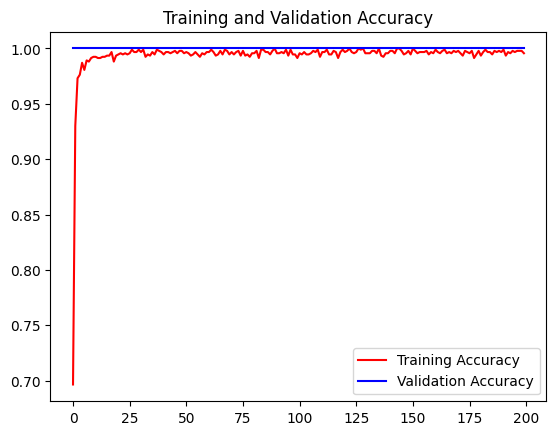

<Figure size 640x480 with 0 Axes>

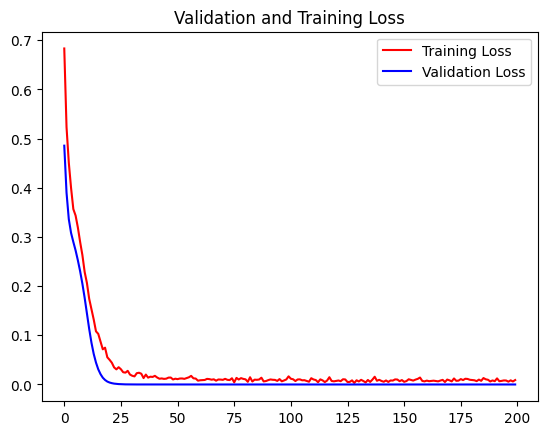

<Figure size 640x480 with 0 Axes>

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 9.058959137369618e-16
Test accuracy: 1.0


## Test Prediction

In [27]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
738,0.000001,0.000003,0.000001,0.000003,0.000001,0.000003,0.000001,0.000003,0.000001,0.000003,...,0.000001,0.000004,0.000001,0.000005,0.000002,0.000005,0.000001,0.000005,0.000001,0.000005


In [28]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [29]:
df_data['class'].unique()

array(['squat', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [30]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [31]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
other


## Export Model

In [32]:
# Download this file for backup
model.save("model.h5")

In [33]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [34]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2025-06-12 07:38:34.047885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749713914.092258    5091 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749713914.106377    5091 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [35]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/model.json (deflated 82%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)


Don't forget to download tfjs model (check relatable folder)